In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings(action ='ignore')

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [12]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100

n_hidden = 256
n_input = 28*28

In [13]:
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))   
                    

In [14]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [15]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

mult.shape

In [16]:
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
cost_array = list()

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val
    
    avg_cost = total_cost/total_batch
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(avg_cost))
    
    cost_array.append(avg_cost)

print('최적화 완료!')


Epoch: 0001 Avg. cost = 0.2000
Epoch: 0002 Avg. cost = 0.0587
Epoch: 0003 Avg. cost = 0.0465
Epoch: 0004 Avg. cost = 0.0425
Epoch: 0005 Avg. cost = 0.0398
Epoch: 0006 Avg. cost = 0.0365
Epoch: 0007 Avg. cost = 0.0357
Epoch: 0008 Avg. cost = 0.0349
Epoch: 0009 Avg. cost = 0.0343
Epoch: 0010 Avg. cost = 0.0324
Epoch: 0011 Avg. cost = 0.0316
Epoch: 0012 Avg. cost = 0.0311
Epoch: 0013 Avg. cost = 0.0307
Epoch: 0014 Avg. cost = 0.0304
Epoch: 0015 Avg. cost = 0.0302
Epoch: 0016 Avg. cost = 0.0299
Epoch: 0017 Avg. cost = 0.0291
Epoch: 0018 Avg. cost = 0.0284
Epoch: 0019 Avg. cost = 0.0270
Epoch: 0020 Avg. cost = 0.0267
최적화 완료!


In [17]:
sample_size = 10
samples = sess.run(decoder, feed_dict = {X: mnist.test.images[:sample_size]})

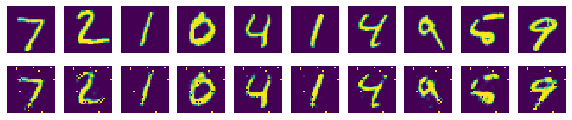

In [18]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

([<matplotlib.axis.XTick at 0x1fb028c5c50>,
 <a list of 10 Text xticklabel objects>)

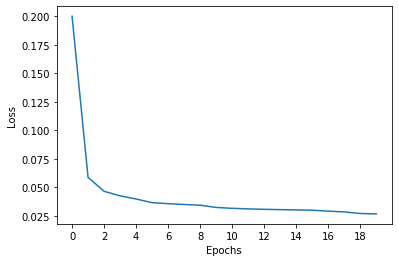

In [21]:
plt.figure()
plt.plot(np.arange(len(cost_array)), cost_array)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0, 20, step=2.0))

In [68]:
np.arange(len(cost_array))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])